Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

Carregando os dados

In [2]:
dados = pd.read_csv('data_cancer2.csv')
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Algumas observaçõs iniciais:
<p>A coluna id podemos deletar, não influencia em nada. A coluna diagnosis temos que transformar para numérica, é a nossa coluna-alvo. A coluna Unnamed: 32 parece ter somente NaN, pode ser deletada.

Maiores informações sobre os tipos de dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Verificando se a coluna Unnamed só tem NaN, se tiver, vamos excluir da base de dados

In [4]:
dados['Unnamed: 32'].isna().sum()

569

In [5]:
# como só tem NaN, vamos excluí-la e vamos excluir também a coluna id
dados.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
dados.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


Resumo Estatístico

In [6]:
dados.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

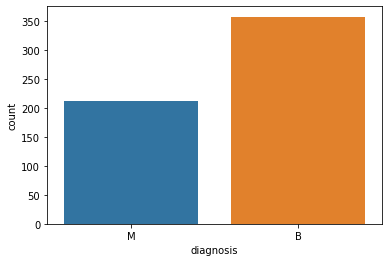

In [7]:
# Gráfico quantidade de diagnóstico tumor (M = maligno, B = benigno)
sns.countplot(data=dados, x='diagnosis')

Transformar a coluna diagnosis (object) para numérica usando o one hot encoder, pois não há uma ordem intrínseca entre as classes M e B

In [8]:
one_hot_encoder = pd.get_dummies(dados['diagnosis'], prefix='diagnosis')

Juntando as colunas codificadas ao DataFrame original

In [9]:
df_encoded = pd.concat([dados, one_hot_encoder], axis=1)

Removendo a coluna original

In [10]:
df_encoded.drop('diagnosis', axis=1, inplace=True)

In [11]:
df_encoded.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,False,True
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,False,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,False,True
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,False,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,False,True


Escolhendo as variáveis previsoras e a variável alvo (Vou usar somente a variável M como alvo)

In [12]:
previsoras = df_encoded.iloc[:, :-2]
alvo = df_encoded['diagnosis_M']

In [13]:
print(previsoras.shape, alvo.shape)

(569, 30) (569,)


Separando em dados de treino e teste

In [32]:
# Transformando a variável alvo em um array unidimensional
alvo = np.ravel(alvo)
alvo.shape

(569,)

In [15]:
X_test, X_train, y_test, y_train = train_test_split(previsoras, alvo, test_size=0.2, random_state=5)

## 1. SVM

Treinando o modelo

In [16]:
svm = SVC(kernel='rbf', random_state=1, C=2)
svm.fit(X_train, y_train)

SVC(C=2, random_state=1)

Previsões com o modelo

In [17]:
svm_predict = svm.predict(X_test)
svm_predict

array([False, False,  True, False,  True, False, False, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,

Avaliação do modelo

In [18]:
print(f'Acurácia: {accuracy_score(y_test, svm_predict) * 100:.2f}%')

Acurácia: 90.55%


Matriz de Confusão

In [19]:
print(f'Matriz de confusão:\n {confusion_matrix(y_test, svm_predict)}')

Matriz de confusão:
 [[283   8]
 [ 35 129]]


In [20]:
print(f'Relatório:\n {classification_report(y_test, svm_predict)}')

Relatório:
               precision    recall  f1-score   support

       False       0.89      0.97      0.93       291
        True       0.94      0.79      0.86       164

    accuracy                           0.91       455
   macro avg       0.92      0.88      0.89       455
weighted avg       0.91      0.91      0.90       455



### Validação Cruzada

In [21]:
from sklearn.model_selection import KFold, cross_val_score

Separando os dados em folds

In [22]:
folds = KFold(n_splits=30, shuffle=True, random_state=5)

Criando o modelo

In [23]:
svm_model = SVC(kernel='rbf', random_state=1, C=2.0)
resultado = cross_val_score(svm_model, previsoras, alvo, cv=folds)

In [24]:
# Usamos a média e o desvio padrão
print(f'Acurácia Média: {resultado.mean() *100:.2f}%')

Acurácia Média: 91.72%


## 2.ÁRVORE DE DECISÃO

Criação e treinamento do modelo

In [25]:
arvore = DecisionTreeClassifier()
arvore.fit(X_train, y_train)

DecisionTreeClassifier()

Previsões

In [26]:
previsoes = arvore.predict(X_test)
previsoes

array([False, False,  True,  True,  True, False, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True,

Matriz de confusão

In [27]:
matriz = confusion_matrix(y_test, previsoes)
matriz

array([[269,  22],
       [ 11, 153]], dtype=int64)

Taxa de acerto

In [28]:
acerto = accuracy_score(y_test, previsoes)
acerto

0.9274725274725275

## 3.Random Forest

Criar e treinar modelo

In [29]:
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train, y_train)

RandomForestClassifier()

Matriz de confusão e Relatório

In [39]:
print(f'Matriz de Confusão:\n{confusion_matrix(y_test, rnd_forest.predict(X_test) , labels=[1, 0])}\n')
print(f'Relatório: {classification_report(y_test, rnd_forest.predict(X_test), labels=[1, 0])}')

Matriz de Confusão:
[[156   8]
 [ 13 278]]

Relatório:               precision    recall  f1-score   support

           1       0.92      0.95      0.94       164
           0       0.97      0.96      0.96       291

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455



## 4.Gradient Booster

Criar e treinar modelo

In [40]:
gbooster = GradientBoostingClassifier()
gbooster.fit(X_train, y_train)

GradientBoostingClassifier()

Avaliação do modelo

In [42]:
print(f'Relatório de Classificação:\n {classification_report(y_test, gbooster.predict(X_test), labels=[1, 0])}')

Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.89      0.89      0.89       164
           0       0.94      0.94      0.94       291

    accuracy                           0.92       455
   macro avg       0.91      0.91      0.91       455
weighted avg       0.92      0.92      0.92       455



## 5.XGBOOST

Importar biblioteca

In [43]:
from xgboost import XGBClassifier

Criar e treinar o modelo

In [44]:
xgboost = XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

Previsoes

In [47]:
xg_predict = xgboost.predict(X_test)
xg_predict

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,

Avaliação do modelo

In [48]:
print(f'Acurácia: {accuracy_score(y_test, xg_predict) *100:.2f}\n')
print(f'Matriz de Confusão:\n {confusion_matrix(y_test, xg_predict)}')
print(f'Relatório:\n {classification_report(y_test, xg_predict)}')

Acurácia: 94.95

Matriz de Confusão:
 [[274  17]
 [  6 158]]
Relatório:
               precision    recall  f1-score   support

       False       0.98      0.94      0.96       291
        True       0.90      0.96      0.93       164

    accuracy                           0.95       455
   macro avg       0.94      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455



### AVALIAÇÃO DOS RESULTADOS

|      ALGORITMO    | DESEMPENHO  | 
|-------------------|-------------|
| SVM               | 90,55%      | 
| ÁRVORE DE DECISÃO | 92,74%      |
| RANDOM FOREST     | 95%         | 
| GRADIENT BOOSTER  | 92%         | 
| XGBOOST           | 95%         | 
